In [1]:
import distl
import numpy as np

# Multivariate Gaussian

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = distl.mvgaussian([5,10, 12], 
                       np.array([[ 2,  1, -1], 
                                 [ 1,  2,  1], 
                                 [-1,  1,  2]]),
                       allow_singular=True,
                       labels=['a', 'b', 'c'])

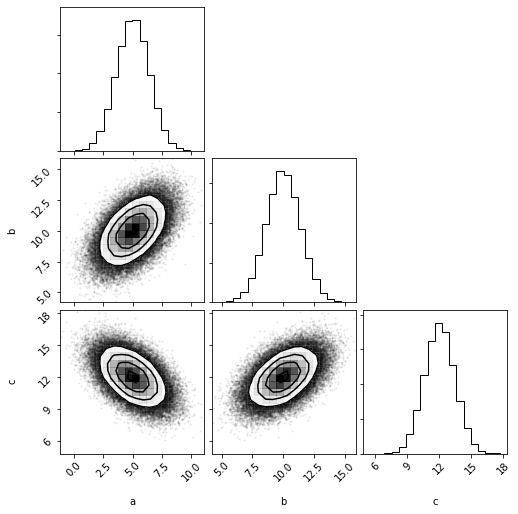

In [3]:
fig = mvg.plot(show=True)

In [4]:
mvg_a = mvg.slice('a')

In [5]:
mvg_a

<distl.mvgaussianslice dimension=0 mean=[5, 10, 12] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True label=a)>

In [6]:
mvg_a.multivariate

<distl.mvgaussian mean=[5, 10, 12] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True labels=['a', 'b', 'c']>

In [7]:
mvg_a.dimension

0

In [8]:
mvg_a.label

'a'

The sliced object acts more or less as the univariate version of the multivariate distribution.

In [9]:
mvg_a.loc

5

In [10]:
mvg_a.scale

1.4142135623730951

Sampling draws from the underlying multivariate distribution but only returns the value for the requested dimension.  This means that covariances can be maintained (when using [DistributionCollection](collections.ipynb) or carefully managing the random seeds manually).

In [11]:
mvg_a.sample()

5.708155660638659

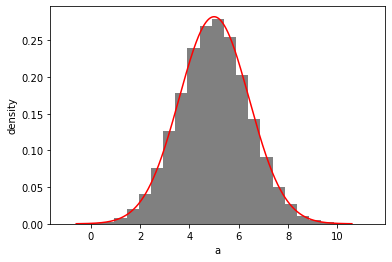

In [12]:
out = mvg_a.plot(show=True)

The exposed univariate methods (pdf, cdf, etc) are based on the univariate version (with the exception of ppf, which is disabled).  If you want the probability of drawing a value of 'a', given some values of 'b' and 'c' (for example), then must pass those three values to the underlying multivariate distribution.

**NOTE**: currently there is no ability to plot_pdf of a with fixed values of b and c.... maybe that would be a better use of "slice" and use "flatten" for this current behavior?

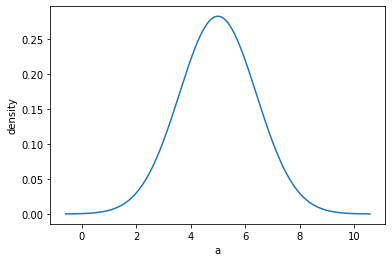

In [13]:
out = mvg_a.plot_pdf(show=True)

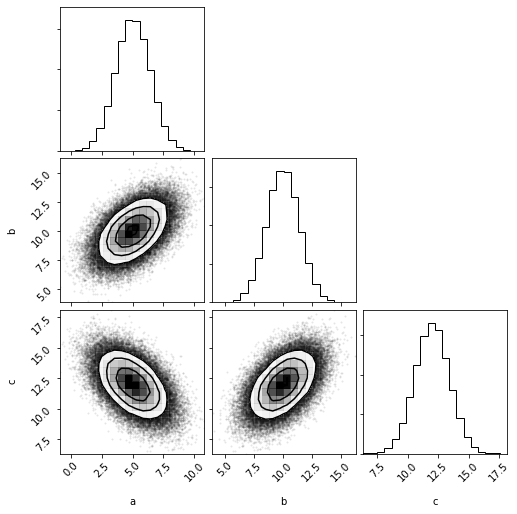

In [14]:
out = mvg_a.multivariate.plot(show=True)

In [15]:
g_a = mvg_a.to_univariate()
# same as mvg.to_univariate(dimension='a')

In [16]:
g_a

<distl.gaussian loc=5.0 scale=1.4142135623730951 label=a>

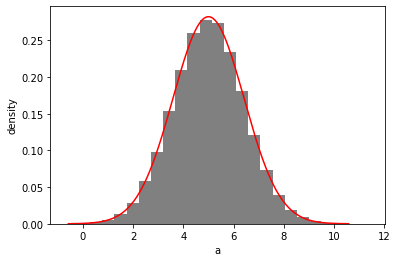

In [17]:
out = g_a.plot(show=True)

In [18]:
mvh = mvg.to_mvhistogram()

# Multivariate Histogram

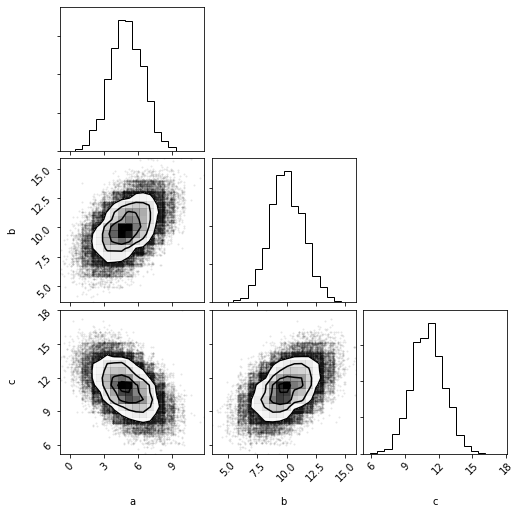

In [19]:
out = mvh.plot(show=True)

In [20]:
mvh_a = mvh.slice('a')

In [21]:
mvh_a.sample()

array([5.52686366])

In [22]:
mvh_a.sample(size=3)

array([4.07182635, 4.31433257, 3.40493425])

In [23]:
mvh_a.bins

array([-1.68769634, -0.77829802,  0.1311003 ,  1.04049862,  1.94989694,
        2.85929526,  3.76869358,  4.6780919 ,  5.58749021,  6.49688853,
        7.40628685,  8.31568517,  9.22508349, 10.13448181, 11.04388013,
       11.95327845])

In [24]:
mvh_a.density

array([1.56192984e-05, 3.34513307e-04, 2.99760368e-03, 1.66098222e-02,
       6.49085975e-02, 1.64611785e-01, 2.82894129e-01, 3.27636910e-01,
       2.53084698e-01, 1.30775179e-01, 4.53363151e-02, 1.05313119e-02,
       1.67907457e-03, 1.73113890e-04, 1.95241229e-05])

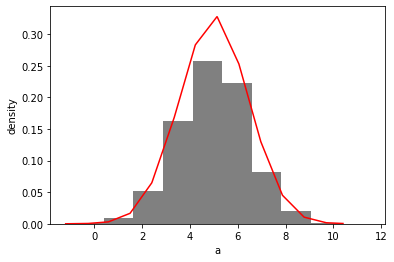

In [25]:
out = mvh_a.plot(show=True, bins=10)

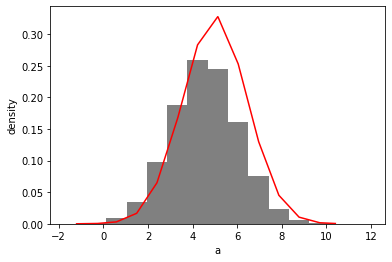

In [26]:
out = mvh_a.to_univariate().plot(show=True)